<a href="https://colab.research.google.com/github/kadammayuresh008/facemaskdetection/blob/main/GroupNo15_Maskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Download Dataset**

First, we download the Face Mask Detection dataset from Google Drive and unzip the downloaded dataset.zip into the data folder.

# **Face Mask Detection**
### **Introduction**
Covid-19 has built a completely new frequency, and the people have realized themselves moving into a new world. While currently our society speedily transforming, we need to be quick to be able to answer fresh specifications, which have encircled all of us. Thus, face mask detection in humans plays a very important role in the current covid time.

### **The Face Mask Detection Dataset**
We have used a publicly available , [the Face Mask Detection Dataset](https://www.kaggle.com/omkargurav/face-mask-dataset).  

The data set consists of  about 7553 RGB images as withmask and withoutmask. Images are named as label withmask and withoutmask. Images of faces with mask are 3725 and images of faces without mask are 3828.


Due to the limited computational power, it is difficult to train the detection model locally on a majority of normal machines. Therefore, we use the processing power offered by Google Colab notebook as it connects us to a free TPU instance quickly and effortlessly.

Mounting google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Changing current directory to **"/content/drive/MyDrive/AML"** 

Unzipping the archive zip file

In [ ]:
import os
os.chdir('/content/drive/MyDrive/AML')
#ONLY UNZIP FIRST TIME
!unzip -q archive.zip

replace data/with_mask/with_mask_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### **Import Libraries**

Importing necessary libraries and modules required to build the detection model.


Numpy:
NumPy is used for array computing.

Cv2:
It mainly focuses on image processing

OS:
The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

Matplotlib.pyplot:
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

LabelBinarizer:
It assigns a unique value or number to each label in a categorical feature.

Adam:
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

img_to_array:  Convert_image_to_array to resize an image to the size DEFAULT_IMAGE_SIZE as defined 

train_test_split:
To Split the data into training and test sets for validation purpose.


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import plot_model
from tensorflow import keras

### **Load Dataset**

Loading the dataset

In [ ]:
Dataset="./data"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['with_mask', 'without_mask']


We use the function convert_image_to_array to resize an image to the size DEFAULT_IMAGE_SIZE we defined below.
 
Then converting the .jpg image to array format that can be used for further processing.

In [ ]:
def convert_image_to_array(image_dir):
    DEFAULT_IMAGE_SIZE = tuple((112, 112))
    img_rows=112
    img_cols=112
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE) 
            grayscale_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            images1=np.array(resized_img)/255.0
            images1=np.reshape(images1,(1,img_rows,img_cols,1)) 
            return images1
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


In [ ]:
img_rows=112
img_cols=112

Here, we load the training data images by traversing through all the folders and converting all the images and labels into separate lists respectively.

Here, we are resizing to the default image size and then converting the .jpg image to array format that can be used for further processing which is strored in images and the labels are stored in labels.

In [ ]:
images=[]
labels=[]
img_rows=112
img_cols=112
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        
        try:
            #concerting image to grayscale
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            
            #resizing the gray scaled images into 56x56 to keep size of the image consistent
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception: ',e)
            
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

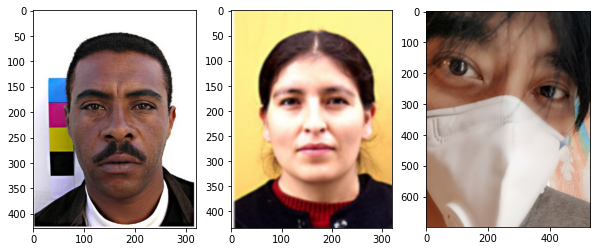

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread("./data/without_mask/without_mask_700.jpg"))
plt.subplot(1, 3, 2)
plt.imshow(plt.imread("./data/without_mask/without_mask_1200.jpg"))
plt.subplot(1, 3, 3)
plt.imshow(plt.imread("./data/with_mask/with_mask_500.jpg"))


Examine the labels/classes in the training dataset.

In [ ]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)

In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### **Split Dataset**
Splitting the data into training and test sets.

In [ ]:
(train_X,test_X,train_y,test_y)=train_test_split(images,labels,test_size=0.25,random_state=0)

### **Build Model**

Defining the hyperparameters of the face mask detection model.

Creating a sequential model and adding Convolutional, Normalization, Pooling, Dropout and Activation layers at the appropriate positions.

**Conv2D layer:** This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well. When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis).

**Activation function:**
 Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.
 Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the weights and biases.

**Relu:**
The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value 
x it returns that value back. So it can be written as f(x)=max(0,x).

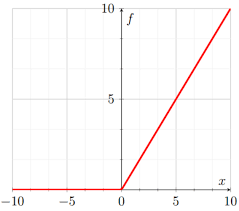

**MaxPooling2D:** Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. The window is shifted by strides in each dimension. The resulting output when using "valid" padding option has a shape(number of rows or columns) of: output_shape = (input_shape - pool_size + 1) / strides).

**Dropout:**
Dropout is implemented per-layer in a neural network.It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer. It is not used on the output layer. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

**Flatten:**
Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. 

**Dense:** The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models. A densely connected layer provides learning features from all the combinations of the features of the previous layer, whereas a convolutional layer relies on consistent features with a small repetitive field.

**Why use ADAM?**
Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
Adam combines the best properties of the AdaGrad(Adaptive Gradient Algorithm) and RMSProp(Root Mean Square Prop) algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
Adam is relatively easy to configure where the default configuration parameters do well on most problems.

**Binary cross entropy:**
Binary crossentropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right). Several independent such questions can be answered at the same time, as in multi-label classification or in binary image segmentation.

**Softmax:**
The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

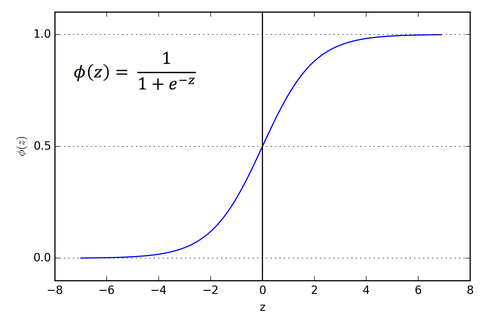




In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

In [ ]:
num_classes=2
batch_size=32

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

### **Model Summary**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

### **Train Model**
We initialize Adam optimizer with learning rate and decay parameters.

Also, we choose the type of loss and metrics for the model and compile it for training.


In [ ]:
from keras.optimizers import Adam

epoch=50
# Compile model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

In [ ]:
fitted_model=model.fit(
train_X,
train_y,   
epochs=epoch,
validation_split=0.25)

Epoch 1/50
133/133 [==============================] - 175s 1s/step - loss: 0.6811 - accuracy: 0.5898 - val_loss: 0.4922 - val_accuracy: 0.7881
Epoch 2/50
133/133 [==============================] - 170s 1s/step - loss: 0.4656 - accuracy: 0.7833 - val_loss: 0.3854 - val_accuracy: 0.8312
Epoch 3/50
133/133 [==============================] - 168s 1s/step - loss: 0.3083 - accuracy: 0.8727 - val_loss: 0.3492 - val_accuracy: 0.8531
Epoch 4/50
133/133 [==============================] - 166s 1s/step - loss: 0.2411 - accuracy: 0.9043 - val_loss: 0.2981 - val_accuracy: 0.8870
Epoch 5/50
133/133 [==============================] - 167s 1s/step - loss: 0.1603 - accuracy: 0.9399 - val_loss: 0.3343 - val_accuracy: 0.8679
Epoch 6/50
133/133 [==============================] - 168s 1s/step - loss: 0.1231 - accuracy: 0.9493 - val_loss: 0.3136 - val_accuracy: 0.8757
Epoch 7/50
133/133 [==============================] - 166s 1s/step - loss: 0.1209 - accuracy: 0.9537 - val_loss: 0.3303 - val_accuracy: 0.8849

### **Save Model**

In [ ]:
model.save('fm.h5')

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/AML/fm.h5")

### **Plot Model**

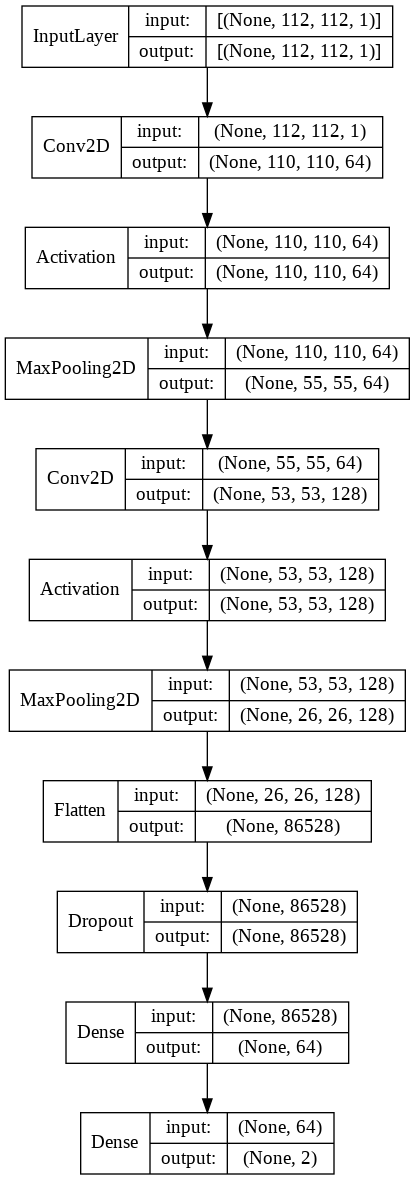

In [ ]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

### **Evaluate Model**
Comparing the accuracy and loss by plotting the graph for training and validation.

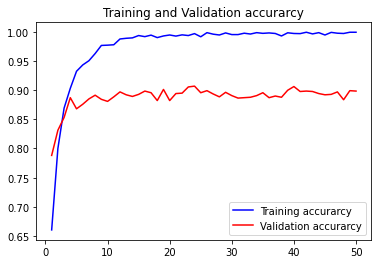

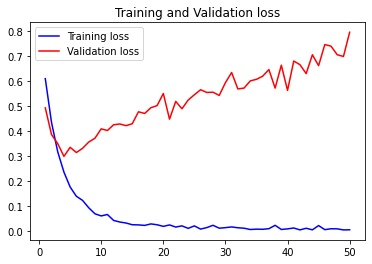

In [ ]:
acc = fitted_model.history['accuracy']
val_acc = fitted_model.history['val_accuracy']
loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Evaluating model accuracy by using the evaluate method

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_X, test_y)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
60/60 [==============================] - 18s 292ms/step - loss: 0.8441 - accuracy: 0.8920
Test Accuracy: 89.20063376426697


### **Test Model**

We write the following predict_mask function to predict the 
 <!-- image. -->

We just need to provide the complete path to the image and it displays the image along with its prediction 
<!-- class or plant disease. -->

In [ ]:
def predict_mask(image_path):
    image_array = convert_image_to_array(image_path)
    plt.imshow(plt.imread(image_path))
    result = model.predict(image_array)
    imageclass = model.predict_classes(image_array)
    # result = model.predict(np_image)
    if imageclass[0]==1:
      imagelabel="No Mask"
    elif imageclass[0]==0 :
      imagelabel="Mask"
    else :
      imagelabel="Cannot be identified"
    plt.title(imagelabel,fontsize= 30)


For testing purposes, we randomly choose images from the dataset and try predicting the images as with mask or without mask.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


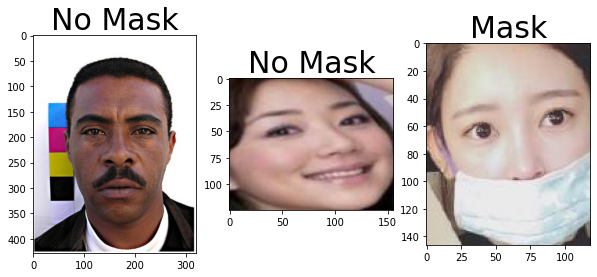

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/without_mask/without_mask_700.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_350.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_170.jpg")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


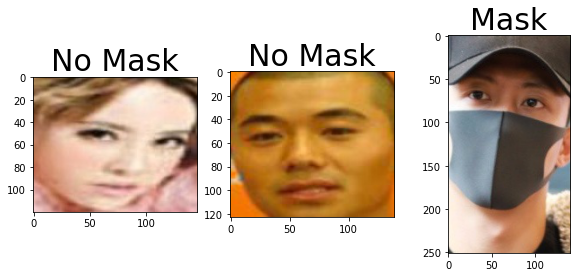

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/without_mask/without_mask_270.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_49.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_300.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


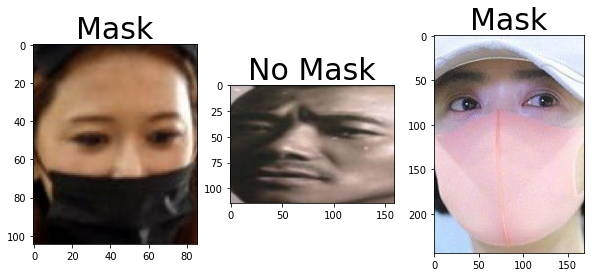

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/with_mask/with_mask_100.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_90.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_70.jpg")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


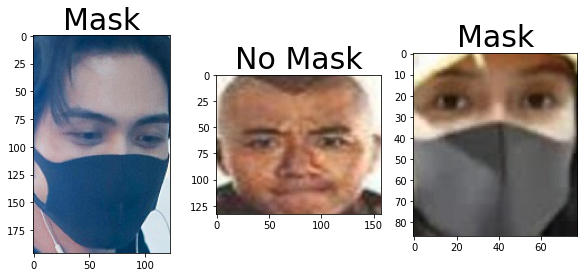

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
predict_mask("./data/with_mask/with_mask_30.jpg")
plt.subplot(1, 3, 2)
predict_mask("./data/without_mask/without_mask_20.jpg")
plt.subplot(1, 3, 3)
predict_mask("./data/with_mask/with_mask_60.jpg")

## **Conclusion**
During this dangerous covid crisis, masks have proven to be a vital thing. But people not wearing the masks becomes harmful not only to themselves but also to society. 

So, using this dataset we created a model that would help to detect whether the person has worn the mask or not. We successfully loaded the dataset, split it into train and test sets, did preprocessing on its contents, and trained the model using the train set. We evaluated the model and maximized the accuracy and decrease the loss (using gradient descent optimizer adam). Using this model we were successfully able to predict whether the person has worn the mask or not of the randomly chosen images.

We found the training accuracy to be 99% and test accuracy to be 89.2%.  The training loss was found to be 0.0058 and the test loss to be 0.8441. 